Peut-on établir un lien entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires ? Est-ce  dans les territoires où la densité est la plus forte que les médecins  pratiquent le moins les dépassement d'honoraires ? Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?

In [57]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

###  Lien entre la densité des médecins par spécialité et par territoire et la pratique du dépassement d'honoraires


##### 1- Récupérer les données des médecins spécialistes:
Ces données représentent les effectifs, les départements et les dépassements d'honoraires des médecins spécialistes

In [58]:
Location = 'Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls'
df_specialistes = pd.read_excel(Location, sep=',', encoding='latin-1', sheet_name='Spécialistes')
df_specialistes = df_specialistes.dropna()
df_specialistes =df_specialistes[df_specialistes['DEPASSEMENTS (Euros)'] != 'nc']
df_specialistes.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.53008e+06,2.49618e+06,0,7.02626e+06
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.98526e+06,373838,0,5.3591e+06
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.1029e+06,560979,0,5.66388e+06
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,2.48538e+07,1.08163e+07,0,3.56701e+07
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5.27125e+06,802542,0,6.07379e+06


In [59]:
# Nettoyer au prélable 
df_specialistes = df_specialistes[~df_specialistes['Spécialistes'].str.contains('TOTAL')]
df_specialistes = df_specialistes[~df_specialistes['DEPARTEMENT'].str.contains('TOTAL')]

##### 2- Grouper les spécialistes :
On va voir les effectifs et les dépassements d'honoraires des médecins par spécialités

In [60]:
# On nettoie un peu les donnée
df_depassement_specialite = df_specialistes.groupby(['Spécialistes']).agg({'EFFECTIFS':sum, 'DEPASSEMENTS (Euros)':sum })
df_depassement_specialite
 

,EFFECTIFS,DEPASSEMENTS (Euros)
Spécialistes,,
02- Anesthésie-réanimation chirurgicale,3443,2.638767e+08
03- Pathologie cardio-vasculaire,4564,5.317715e+07
04- Chirurgie générale,963,8.781544e+07
05- Dermato-vénéréologie,2816,9.405532e+07
06- Radiodiagnostic et imagerie médicale,5298,1.860858e+08
07- Gynécologie obstétrique,3379,2.519320e+08
08- Gastro-entérologie et hépatologie,1815,5.998755e+07
09- Médecine interne,143,6.795585e+06
10- Neurochirurgie,71,1.469825e+07


##### 3- Visualiser les dépassements d'honoraires en fonction de l'effectif des médecins par spécialité:


In [61]:
reg = lm.LinearRegression()
X = df_depassement_specialite['EFFECTIFS']
Y = df_depassement_specialite['DEPASSEMENTS (Euros)']
X_reshaped = df_depassement_specialite[['EFFECTIFS']]
model = reg.fit(X_reshaped,Y)
intercept = model.intercept_
pente = model.coef_

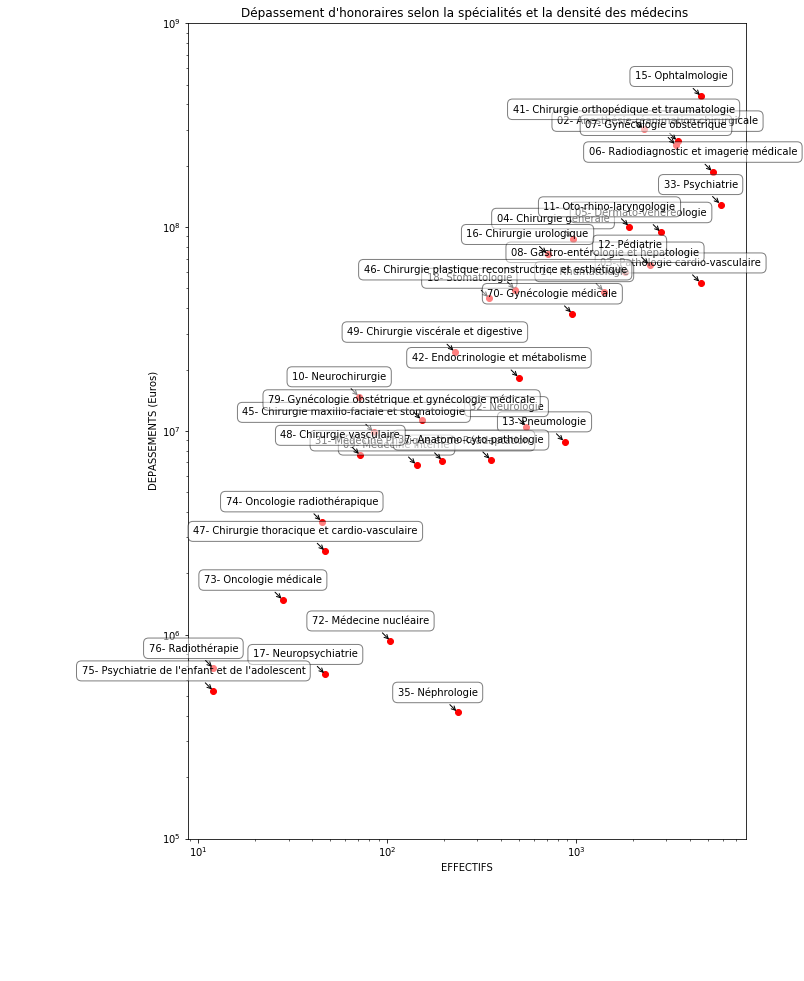

In [62]:
fig = plt.figure(figsize = (10,15)) 
ax = plt.subplot() # Créer la figure et les set of subplots.

indexes = df_depassement_specialite.index
labels = [re.findall(r'\d+', x) for x in indexes]
ax.plot(X,Y, 'ro')
plt.xlabel('EFFECTIFS')
plt.ylabel('DEPASSEMENTS (Euros)')

#Ypred = intercept + pente * X
#ax.plot(X.values, Ypred.values, label="OLS-sm-w-intercept")

plt.xscale('log')
plt.yscale('log')
plt.ylim(10**5, 10**9) 

plt.title('Dépassement d\'honoraires selon la spécialités et la densité des médecins ')
for label, x, y in zip(indexes, X, Y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

plt.show()

##### 4- Grouper selon les spécialistes :
On va voir les effectifs et les dépassements d'honoraires des médecins par région

In [63]:
#on nettoie un peu les données
df_depassement_departement = df_specialistes.groupby(['DEPARTEMENT']).agg({'EFFECTIFS':sum, 'DEPASSEMENTS (Euros)':sum })
df_depassement_departement.head()

,EFFECTIFS,DEPASSEMENTS (Euros)
DEPARTEMENT,,
01- Ain,175,10720493.41
02- Aisne,240,4501531.88
03- Allier,134,4082129.59
04- Alpes-Hte-Provence,11,1715.47
05- Hautes-Alpes,24,221777.88


##### 5- Visualiser les dépassements d'honoraires en fonction de l'effectif des médecins par région:

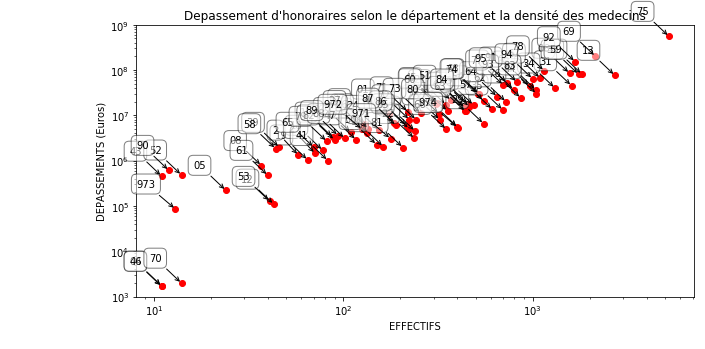

In [64]:
fig = plt.figure(figsize = (10,5))  
X = df_depassement_departement['EFFECTIFS']
Y = df_depassement_departement['DEPASSEMENTS (Euros)']
indexes = df_depassement_departement.index
labels = [re.findall(r'\d+', x)[0] for x in indexes]
plt.plot(X,Y, 'ro')
plt.xlabel('EFFECTIFS')
plt.ylabel('DEPASSEMENTS (Euros)')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**3, 10**9)
plt.title('Depassement d\'honoraires selon le département et la densité des medecins')
for label, x, y in zip(labels, X, Y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

plt.show()

### Etape 2
Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...)

##### 1- Récupérer les données de la population par groupe âge et département

In [65]:

Location_population = 'structure_population_sexe_groupe_age_par_departement.xls'
df_population = pd.read_excel(Location_population, sep=',', encoding='latin-1', sheet_name='2016', skiprows=6)
# nettoyer les données
df_population = df_population.dropna()
df_population = df_population.rename(columns={"Départements et régions": "DEPARTEMENT"})
df_population.head()


,DEPARTEMENT,Population totale au 1er janvier,Moins de 15 ans,Moins de 20 ans,De 20 à 59 ans,60 ans ou plus,75 ans ou plus,Moins de 15 ans.1,Moins de 20 ans.1,De 20 à 59 ans.1,60 ans ou plus.1,75 ans ou plus.1,De 15 à 49 ans
0,Paris,2194143.0,159878.0,215677.0,617930.0,199035.0,62130.0,153755.0,214249.0,671555.0,275697.0,105548.0,593010.0
1,Seine-et-Marne,1401292.0,153552.0,201167.0,363098.0,119165.0,32490.0,146378.0,192480.0,379549.0,145833.0,51570.0,333433.0
2,Yvelines,1431344.0,150462.0,197642.0,364649.0,135319.0,41689.0,144524.0,188598.0,377586.0,167550.0,63937.0,324297.0
3,Essonne,1289199.0,137744.0,181182.0,336821.0,112525.0,34534.0,132986.0,173564.0,346045.0,139062.0,53119.0,303357.0
4,Hauts-de-Seine,1605627.0,159130.0,206281.0,427818.0,131805.0,42544.0,152620.0,198479.0,461793.0,179451.0,72703.0,403848.0


##### 2- Nettoyer les données des spécialités 
Nettoyer la colonnes 'DEPARTEMENT' pour préparer le merge entre données

In [66]:
for val in df_population['DEPARTEMENT']:
    df_specialistes.loc[df_specialistes['DEPARTEMENT'].str.contains(val), 'DEPARTEMENT'] = val
df_specialistes.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,Ain,17,4.53008e+06,2.49618e+06,0,7.02626e+06
1,02- Anesthésie-réanimation chirurgicale,Aisne,19,4.98526e+06,373838,0,5.3591e+06
2,02- Anesthésie-réanimation chirurgicale,Allier,19,5.1029e+06,560979,0,5.66388e+06
5,02- Anesthésie-réanimation chirurgicale,Alpes-Maritimes,110,2.48538e+07,1.08163e+07,0,3.56701e+07
6,02- Anesthésie-réanimation chirurgicale,Ardèche,23,5.27125e+06,802542,0,6.07379e+06


##### 2- Merger les données des spécialités + la population


In [67]:

result = pd.merge(df_specialistes, df_population, on='DEPARTEMENT')
#Nettoyer les données


result.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),Population totale au 1er janvier,Moins de 15 ans,Moins de 20 ans,De 20 à 59 ans,60 ans ou plus,75 ans ou plus,Moins de 15 ans.1,Moins de 20 ans.1,De 20 à 59 ans.1,60 ans ou plus.1,75 ans ou plus.1,De 15 à 49 ans
0,02- Anesthésie-réanimation chirurgicale,Ain,17,4.53008e+06,2.49618e+06,0,7.02626e+06,637867.0,65696.0,85701.0,162944.0,66123.0,19966.0,62603.0,81320.0,162903.0,78876.0,30239.0,138871.0
1,20- Réanimation médicale,Ain,0,0,0,0,0,637867.0,65696.0,85701.0,162944.0,66123.0,19966.0,62603.0,81320.0,162903.0,78876.0,30239.0,138871.0
2,03- Pathologie cardio-vasculaire,Ain,20,6.04836e+06,252877,0,6.30124e+06,637867.0,65696.0,85701.0,162944.0,66123.0,19966.0,62603.0,81320.0,162903.0,78876.0,30239.0,138871.0
3,43- Chirurgie infantile,Ain,0,0,0,0,0,637867.0,65696.0,85701.0,162944.0,66123.0,19966.0,62603.0,81320.0,162903.0,78876.0,30239.0,138871.0
4,44- Chirurgie maxillo-faciale,Ain,0,0,0,0,0,637867.0,65696.0,85701.0,162944.0,66123.0,19966.0,62603.0,81320.0,162903.0,78876.0,30239.0,138871.0


#### 3- Grouper selon le département, en récupérent la densité de la population et les effectifs des médecins

In [68]:
df_population_totale_medecins = result.groupby(['DEPARTEMENT']).agg({'Population totale au 1er janvier':np.mean,'EFFECTIFS':sum})
df_population_totale_medecins.head()

,Population totale au 1er janvier,EFFECTIFS
DEPARTEMENT,,
Ain,637867.0,175
Aisne,537423.0,240
Allier,340785.0,134
Alpes-Maritimes,1081896.0,1569
Ardennes,275762.0,37


#### 3- Visualiser selon le département,  les effectifs des médecins en fonction de  la densité de la population

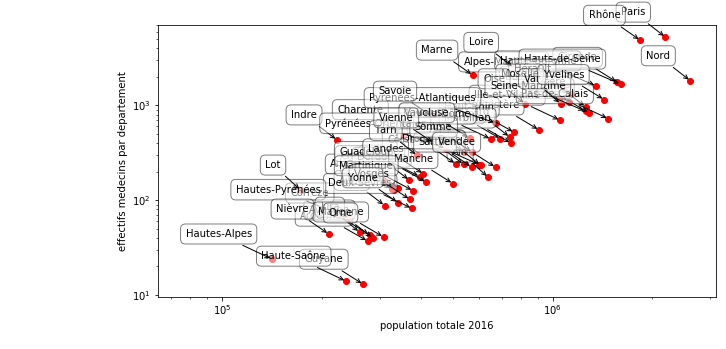

In [69]:
fig = plt.figure(figsize = (10,5))  
plt.plot(df_population_totale_medecins['Population totale au 1er janvier'], df_population_totale_medecins['EFFECTIFS'], 'ro')
plt.xlabel('population totale 2016')
plt.ylabel('effectifs medecins par departement')
plt.yscale('log')
indexes = df_population_totale_medecins.index
for label, x, y in zip(indexes, df_population_totale_medecins['Population totale au 1er janvier'], df_population_totale_medecins['EFFECTIFS']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.xscale('log')
plt.show()

#### 4- Grouper selon le département et la spécialité, les groupe d'âge de la population

In [70]:
df_population_departement_specialites = result.groupby(['DEPARTEMENT', 'Spécialistes']).agg({'EFFECTIFS':sum,'Moins de 15 ans':sum,'Moins de 20 ans': sum, 'De 20 à 59 ans': sum, '60 ans ou plus':sum, '75 ans ou plus':sum, 'Moins de 15 ans.1': sum, 'Moins de 20 ans.1': sum, 'De 20 à 59 ans.1':sum, '60 ans ou plus.1':sum, '75 ans ou plus.1': sum})
df_population_departement_specialites.head()

EFFECTIFS  \
DEPARTEMENT Spécialistes                                          
Ain         02- Anesthésie-réanimation chirurgicale          17   
            03- Pathologie cardio-vasculaire                 20   
            05- Dermato-vénéréologie                         14   
            06- Radiodiagnostic et imagerie médicale         39   
            07- Gynécologie obstétrique                      16   

                                                      Moins de 15 ans  \
DEPARTEMENT Spécialistes                                                
Ain         02- Anesthésie-réanimation chirurgicale           65696.0   
            03- Pathologie cardio-vasculaire                  65696.0   
            05- Dermato-vénéréologie                          65696.0   
            06- Radiodiagnostic et imagerie médicale          65696.0   
            07- Gynécologie obstétrique                       65696.0   

                                                      Moins de 20 ans  \
DEPARTEMENT Spécialistes                                                
Ain         02- Anesthésie-réanimation chirurgicale           85701.0   
            03- Pathologie cardio-vasculaire                  85701.0   
            05- Dermato-vénéréologie                          85701.0   
            06- Radiodiagnostic et imagerie médicale          85701.0   
            07- Gynécologie obstétrique                       85701.0   

                                                      De 20 à 59 ans  \
DEPARTEMENT Spécialistes                                               
Ain         02- Anesthésie-réanimation chirurgicale         162944.0   
            03- Pathologie cardio-vasculaire                162944.0   
            05- Dermato-vénéréologie                        162944.0   
            06- Radiodiagnostic et imagerie médicale        162944.0   
            07- Gynécologie obstétrique                     162944.0   

                                                      60 ans ou plus  \
DEPARTEMENT Spécialistes                                               
Ain         02- Anesthésie-réanimation chirurgicale          66123.0   
            03- Pathologie cardio-vasculaire                 66123.0   
            05- Dermato-vénéréologie                         66123.0   
            06- Radiodiagnostic et imagerie médicale         66123.0   
            07- Gynécologie obstétrique                      66123.0   

                                                      75 ans ou plus  \
DEPARTEMENT Spécialistes                                               
Ain         02- Anesthésie-réanimation chirurgicale          19966.0   
            03- Pathologie cardio-vasculaire                 19966.0   
            05- Dermato-vénéréologie                         19966.0   
            06- Radiodiagnostic et imagerie médicale         19966.0   
            07- Gynécologie obstétrique                      19966.0   

                                                      Moins de 15 ans.1  \
DEPARTEMENT Spécialistes                                                  
Ain         02- Anesthésie-réanimation chirurgicale             62603.0   
            03- Pathologie cardio-vasculaire                    62603.0   
            05- Dermato-vénéréologie                            62603.0   
            06- Radiodiagnostic et imagerie médicale            62603.0   
            07- Gynécologie obstétrique                         62603.0   

                                                      Moins de 20 ans.1  \
DEPARTEMENT Spécialistes                                                  
Ain         02- Anesthésie-réanimation chirurgicale             81320.0   
            03- Pathologie cardio-vasculaire                    81320.0   
            05- Dermato-vénéréologie                            81320.0   
            06- Radiodiagnostic et imagerie médicale            81320.0   
            07- Gynécologie obstétrique                         81320

#### 5- Visualiser pour 2 groupes d'âge, la répartition de la spécialité de pédiatrie

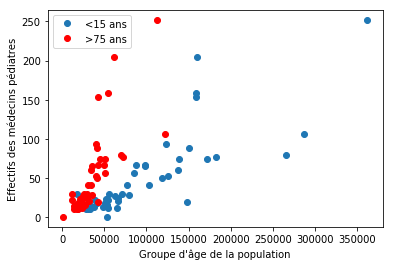

In [71]:
# Pediatrie : 12- Pédiatrie
df_pediatrie = df_population_departement_specialites[df_population_departement_specialites.index.get_level_values('Spécialistes').str.startswith('12- Pédiatrie')]

plt.plot(df_pediatrie['Moins de 15 ans'],df_pediatrie['EFFECTIFS'], 'o', label='<15 ans')
plt.plot(df_pediatrie['75 ans ou plus'] ,df_pediatrie['EFFECTIFS'], 'ro', label='>75 ans')
plt.xlabel('Groupe d\'âge de la population')
plt.ylabel('Effectifs des médecins pédiatres')
plt.legend()
plt.show()

#### 6- importer maintenant les données des auxilaires médicaux

In [72]:
## Importer les données des infirmiers'
df_infirmiers = pd.read_excel(Location, sep=',', encoding='latin-1', sheet_name='Auxiliaires médicaux')

# Nettoyer les données
df_infirmiers.dropna()
df_infirmiers = df_infirmiers[~df_infirmiers['Auxiliaires médicaux'].str.contains('TOTAL')]
df_infirmiers = df_infirmiers[~df_infirmiers['DEPARTEMENT'].str.contains('TOTAL')]
df_infirmiers.head()


,Auxiliaires médicaux,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,24- Infirmiers,01- Ain,764,4.24955e+07,2077.22,1.40568e+07,5.65543e+07
1,24- Infirmiers,02- Aisne,702,4.76148e+07,4669.12,1.33161e+07,6.09356e+07
2,24- Infirmiers,03- Allier,524,3.39312e+07,2595.01,1.11538e+07,4.50876e+07
3,24- Infirmiers,04- Alpes-Hte-Provence,363,2.28882e+07,788.31,6.93332e+06,2.98223e+07
4,24- Infirmiers,05- Hautes-Alpes,291,1.65395e+07,1247.52,5756452,2.22972e+07


#### 7- Nettoyer les données des auxilaires médicaux pour préparer le merge avec les données de population

In [73]:
for val in df_population['DEPARTEMENT']:
    df_infirmiers.loc[df_infirmiers['DEPARTEMENT'].str.contains(val), 'DEPARTEMENT'] = val
df_infirmiers.head()

,Auxiliaires médicaux,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,24- Infirmiers,Ain,764,4.24955e+07,2077.22,1.40568e+07,5.65543e+07
1,24- Infirmiers,Aisne,702,4.76148e+07,4669.12,1.33161e+07,6.09356e+07
2,24- Infirmiers,Allier,524,3.39312e+07,2595.01,1.11538e+07,4.50876e+07
3,24- Infirmiers,04- Alpes-Hte-Provence,363,2.28882e+07,788.31,6.93332e+06,2.98223e+07
4,24- Infirmiers,Hautes-Alpes,291,1.65395e+07,1247.52,5756452,2.22972e+07


#### 8- Faire un merge entre les données de populations et celles des auxilaires médicaux

In [74]:
result_auxiliaires_population = pd.merge(df_population, df_infirmiers, on='DEPARTEMENT')
result_auxiliaires_population.head()

,DEPARTEMENT,Population totale au 1er janvier,Moins de 15 ans,Moins de 20 ans,De 20 à 59 ans,60 ans ou plus,75 ans ou plus,Moins de 15 ans.1,Moins de 20 ans.1,De 20 à 59 ans.1,60 ans ou plus.1,75 ans ou plus.1,De 15 à 49 ans,Auxiliaires médicaux,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,Paris,2194143.0,159878.0,215677.0,617930.0,199035.0,62130.0,153755.0,214249.0,671555.0,275697.0,105548.0,593010.0,24- Infirmiers,1406,1.03248e+08,1.22844e+06,1.47174e+07,1.19194e+08
1,Paris,2194143.0,159878.0,215677.0,617930.0,199035.0,62130.0,153755.0,214249.0,671555.0,275697.0,105548.0,593010.0,26- Masseurs-kinésithérapeutes-rééducateurs,2883,1.55854e+08,4.93798e+07,5.74298e+06,2.10977e+08
2,Paris,2194143.0,159878.0,215677.0,617930.0,199035.0,62130.0,153755.0,214249.0,671555.0,275697.0,105548.0,593010.0,27- Pédicures,532,422684,172146,2156.65,596987
3,Paris,2194143.0,159878.0,215677.0,617930.0,199035.0,62130.0,153755.0,214249.0,671555.0,275697.0,105548.0,593010.0,28- Orthophonistes,795,3.90124e+07,211465,352560,3.95764e+07
4,Paris,2194143.0,159878.0,215677.0,617930.0,199035.0,62130.0,153755.0,214249.0,671555.0,275697.0,105548.0,593010.0,29- Orthoptistes,103,4.53466e+06,495658,954.31,5.03127e+06


#### 9- Grouper selon le département et le type d'auxiliaires, les effectifs et les groupes d'âge

In [75]:
df_population_departement_auxiliaires = result_auxiliaires_population.groupby(['DEPARTEMENT', 'Auxiliaires médicaux']).agg({'EFFECTIFS':sum,'Moins de 15 ans':sum,'Moins de 20 ans': sum, 'De 20 à 59 ans': sum, '60 ans ou plus':sum, '75 ans ou plus':sum, 'Moins de 15 ans.1': sum, 'Moins de 20 ans.1': sum, 'De 20 à 59 ans.1':sum, '60 ans ou plus.1':sum, '75 ans ou plus.1': sum})
df_population_departement_auxiliaires.head()

EFFECTIFS  \
DEPARTEMENT Auxiliaires médicaux                                     
Ain         24- Infirmiers                                     764   
            26- Masseurs-kinésithérapeutes-rééducateurs        420   
            27- Pédicures                                       78   
            28- Orthophonistes                                 160   
            29- Orthoptistes                                    15   

                                                         Moins de 15 ans  \
DEPARTEMENT Auxiliaires médicaux                                           
Ain         24- Infirmiers                                       65696.0   
            26- Masseurs-kinésithérapeutes-rééducateurs          65696.0   
            27- Pédicures                                        65696.0   
            28- Orthophonistes                                   65696.0   
            29- Orthoptistes                                     65696.0   

                                                         Moins de 20 ans  \
DEPARTEMENT Auxiliaires médicaux                                           
Ain         24- Infirmiers                                       85701.0   
            26- Masseurs-kinésithérapeutes-rééducateurs          85701.0   
            27- Pédicures                                        85701.0   
            28- Orthophonistes                                   85701.0   
            29- Orthoptistes                                     85701.0   

                                                         De 20 à 59 ans  \
DEPARTEMENT Auxiliaires médicaux                                          
Ain         24- Infirmiers                                     162944.0   
            26- Masseurs-kinésithérapeutes-rééducateurs        162944.0   
            27- Pédicures                                      162944.0   
            28- Orthophonistes                                 162944.0   
            29- Orthoptistes                                   162944.0   

                                                         60 ans ou plus  \
DEPARTEMENT Auxiliaires médicaux                                          
Ain         24- Infirmiers                                      66123.0   
            26- Masseurs-kinésithérapeutes-rééducateurs         66123.0   
            27- Pédicures                                       66123.0   
            28- Orthophonistes                                  66123.0   
            29- Orthoptistes                                    66123.0   

                                                         75 ans ou plus  \
DEPARTEMENT Auxiliaires médicaux                                          
Ain         24- Infirmiers                                      19966.0   
            26- Masseurs-kinésithérapeutes-rééducateurs         19966.0   
            27- Pédicures                                       19966.0   
            28- Orthophonistes                                  19966.0   
            29- Orthoptistes                                    19966.0   

                                                         Moins de 15 ans.1  \
DEPARTEMENT Auxiliaires médicaux                                             
Ain         24- Infirmiers                                         62603.0   
            26- Masseurs-kinésithérapeutes-rééducateurs            62603.0   
            27- Pédicures                                          62603.0   
            28- Orthophonistes                                     62603.0   
            29- Orthoptistes                                       62603.0   

                                                         Moins de 20 ans.1  \
DEPARTEMENT Auxiliaires médicaux                                             
Ain         24- Infirmiers                                         81320.0   
            26- Masseurs-kinésithérapeutes-rééducateurs            81320.0   
            27- Pédicures                                      

#### 10- Retirer les données relatives aux infirmiers seulement

In [76]:
df_infirmiers =  df_population_departement_auxiliaires[df_population_departement_auxiliaires.index.get_level_values('Auxiliaires médicaux').str.startswith('24- Infirmiers')]
df_infirmiers.head()

,,EFFECTIFS,Moins de 15 ans,Moins de 20 ans,De 20 à 59 ans,60 ans ou plus,75 ans ou plus,Moins de 15 ans.1,Moins de 20 ans.1,De 20 à 59 ans.1,60 ans ou plus.1,75 ans ou plus.1
DEPARTEMENT,Auxiliaires médicaux,,,,,,,,,,,
Ain,24- Infirmiers,764,65696.0,85701.0,162944.0,66123.0,19966.0,62603.0,81320.0,162903.0,78876.0,30239.0
Aisne,24- Infirmiers,702,52958.0,69972.0,130810.0,60620.0,17841.0,50662.0,66912.0,131910.0,77199.0,30863.0
Allier,24- Infirmiers,524,26929.0,36354.0,77855.0,49186.0,17008.0,26040.0,34832.0,78891.0,63667.0,27756.0
Alpes-Maritimes,24- Infirmiers,2516,88161.0,118659.0,257056.0,137182.0,49857.0,83183.0,112110.0,272406.0,184483.0,80805.0
Ardennes,24- Infirmiers,367,25556.0,33829.0,67705.0,32830.0,10089.0,24449.0,32066.0,67994.0,41338.0,17110.0


#### 11- Visualiser pour 2 groupes d'âge, la répartition des effectifs des infirimiers

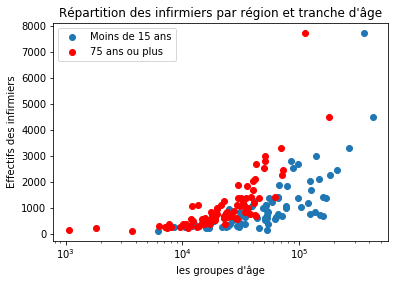

In [77]:
plt.plot(df_infirmiers['Moins de 15 ans'],df_infirmiers['EFFECTIFS'], 'o', label='Moins de 15 ans')
plt.plot(df_infirmiers['75 ans ou plus'],df_infirmiers['EFFECTIFS'], 'ro', label='75 ans ou plus')
plt.xlabel('les groupes d\'âge')
plt.ylabel('Effectifs des infirmiers')
plt.title('Répartition des infirmiers par région et tranche d\'âge')
plt.legend()
plt.xscale('log')

### Supplément:
Les spécialités les plus répandues par région

In [78]:
# Selon la région, quelle est la spécialité la plus répandue
df_population_departement_specialites = result.loc[result.groupby(['DEPARTEMENT'])['EFFECTIFS'].idxmax()]
df_population_departement_specialites

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),Population totale au 1er janvier,Moins de 15 ans,Moins de 20 ans,De 20 à 59 ans,60 ans ou plus,75 ans ou plus,Moins de 15 ans.1,Moins de 20 ans.1,De 20 à 59 ans.1,60 ans ou plus.1,75 ans ou plus.1,De 15 à 49 ans
8,06- Radiodiagnostic et imagerie médicale,Ain,39,1.7404e+07,2.37478e+06,0,1.97788e+07,637867.0,65696.0,85701.0,162944.0,66123.0,19966.0,62603.0,81320.0,162903.0,78876.0,30239.0,138871.0
32,06- Radiodiagnostic et imagerie médicale,Aisne,31,1.80432e+07,86241.8,0,1.81294e+07,537423.0,52958.0,69972.0,130810.0,60620.0,17841.0,50662.0,66912.0,131910.0,77199.0,30863.0,110945.0
58,06- Radiodiagnostic et imagerie médicale,Allier,29,1.21864e+07,2295.47,10.92,1.21887e+07,340785.0,26929.0,36354.0,77855.0,49186.0,17008.0,26040.0,34832.0,78891.0,63667.0,27756.0,63102.0
95,33- Psychiatrie,Alpes-Maritimes,197,2.17401e+07,3.09222e+06,2728.54,2.48351e+07,1081896.0,88161.0,118659.0,257056.0,137182.0,49857.0,83183.0,112110.0,272406.0,184483.0,80805.0,225831.0
1822,03- Pathologie cardio-vasculaire,Ardennes,14,3.03635e+06,1606.27,0,3.03796e+06,275762.0,25556.0,33829.0,67705.0,32830.0,10089.0,24449.0,32066.0,67994.0,41338.0,17110.0,55827.0
100,02- Anesthésie-réanimation chirurgicale,Ardèche,23,5.27125e+06,802542,0,6.07379e+06,325877.0,28496.0,37451.0,76414.0,45107.0,14661.0,27587.0,35868.0,76900.0,54137.0,22061.0,62066.0
130,02- Anesthésie-réanimation chirurgicale,Ariège,0,0,0,0,0,152542.0,12514.0,16568.0,35508.0,22516.0,7608.0,11818.0,15462.0,35774.0,26714.0,11563.0,28159.0
159,06- Radiodiagnostic et imagerie médicale,Aube,18,9.75222e+06,2572.79,1,9.75479e+06,310068.0,29085.0,38749.0,75075.0,36686.0,11666.0,27598.0,36575.0,75795.0,47188.0,19643.0,64198.0
180,06- Radiodiagnostic et imagerie médicale,Aude,38,1.75017e+07,23984.3,0,1.75257e+07,368311.0,30926.0,41123.0,83397.0,52844.0,17470.0,29824.0,39402.0,86931.0,64614.0,26206.0,70918.0
1840,03- Pathologie cardio-vasculaire,Aveyron,16,3.62305e+06,8666.92,0,3.63172e+06,279835.0,22620.0,30229.0,65174.0,42511.0,15530.0,21087.0,27662.0,63220.0,51039.0,23148.0,50110.0
